* `Import Libraries`

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# sklearn - preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder


# sklearn - models
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# warnings
import warnings 
warnings.filterwarnings('ignore')


# sklearn - metrics
from sklearn.metrics import accuracy_score , f1_score

* `Loading and Understanding data`

In [102]:
df1 = pd.read_csv(r'C:\On_The_Fly_Project\cicids2018\Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
df2 = pd.read_csv(r'C:\On_The_Fly_Project\cicids2018\Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')

df = pd.concat([df1,df1],ignore_index=False)

In [103]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [104]:
df.shape

(2097150, 80)

In [105]:
df.drop('Timestamp',axis=1,inplace=True)

In [106]:
df.head(3)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097150 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    int64  
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       int64  
 20  Flow IAT Min       int64  
 21  Fwd IAT Tot        int64  
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        int64  
 25  Fwd IAT Min        int6

In [108]:
df.duplicated().sum()

1212492

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.duplicated().sum()

0

In [111]:
df.isna().sum()

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 79, dtype: int64

In [112]:
df.dropna(inplace=True)

In [113]:
df['Label'].value_counts()

Label
Benign                   828585
DoS attacks-GoldenEye     41406
DoS attacks-Slowloris      9908
Name: count, dtype: int64

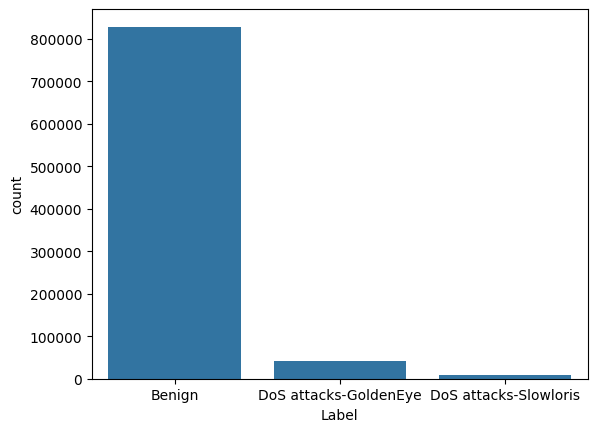

In [114]:
sns.countplot(x=df['Label'] , data=df)
plt.show()

In [115]:
df.shape

(879899, 79)

In [116]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [117]:
X = df.drop(['Label'],axis=1)
y = df['Label']

y.value_counts(normalize=True)

Label
Benign                   0.941486
DoS attacks-GoldenEye    0.047216
DoS attacks-Slowloris    0.011298
Name: proportion, dtype: float64

In [118]:
# Split to train & test folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, shuffle=True, stratify=y)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (745404, 78)
y_train.shape 	 (745404,)
******************************
X_test.shape 	 (131542, 78)
y_test.shape 	 (131542,)


In [119]:
X_train.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

* `Data Preprocessing & Pipeline`

In [120]:
# Automatically detect numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", num_cols)


Numerical columns: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', '

In [121]:
# Pipeline

# Numerical: num_cols --> Imputing using median, and StandardScaler
# Categorical: categ_cols --> Imputing using mode, and OHE
# Ready Cols: ready_cols --> Imputing mode


# For Numerical
num_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())
                ])


# # For Categorical
# categ_pipeline = Pipeline(steps=[
#                     ('imputer', SimpleImputer(strategy='most_frequent')),
#                     ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
#                 ])


# Combine all secondary pipelines into one total pipeline
all_pipeline = ColumnTransformer(transformers=[
                    ('numerical', num_pipeline, num_cols), 
                ])


# Apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [122]:
X_train_final.shape, y_train.shape

((745404, 78), (745404,))

In [123]:
X_train_final

array([[-0.2651238 , -0.58227229, -0.45103298, ..., -0.12375308,
        -0.34262533, -0.32387299],
       [-0.44659622,  1.57638706, -0.47537487, ..., -0.12375308,
        -0.34262533, -0.32387299],
       [-0.44659622,  1.57638706, -0.47421548, ..., -0.12375308,
        -0.34262533, -0.32387299],
       ...,
       [ 2.27407575, -0.58227229, -0.4765205 , ..., -0.12375308,
        -0.34262533, -0.32387299],
       [-0.42527212, -0.58227229, -0.45014511, ..., -0.12375308,
        -0.34262533, -0.32387299],
       [-0.44659622,  1.57638706, -0.47645912, ..., -0.12375308,
        -0.34262533, -0.32387299]])

In [124]:
X_test_final.shape, y_test.shape

((131542, 78), (131542,))

In [125]:
y_train.value_counts()

Label
Benign                   701787
DoS attacks-GoldenEye     35195
DoS attacks-Slowloris      8422
Name: count, dtype: int64

* LabelEncoder

In [126]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

* `Dealing with Imbalancing Data`

In [127]:
# Assuming y_train is your target labels (class labels)
# Step 1: Calculate class frequencies
class_counts = np.bincount(y_train)  # Counts occurrences of each class

# Step 2: Calculate the inverse of class frequencies (weights)
total_samples = len(y_train)
vals_count = 1 - (class_counts / total_samples)  # Inverse of frequency
vals_count = vals_count / np.sum(vals_count)  # Normalize the weights to sum to 1

# Step 3: Create class_weights dictionary
dict_weights = {i: vals_count[i] for i in range(len(class_counts))}

dict_weights

{0: 0.029257288664938763, 1: 0.4763919968231992, 2: 0.494350714511862}

* `RandomForestClassifier`

In [128]:
# 2. Using class_weight
forest_clf = RandomForestClassifier(criterion='gini', n_estimators=100, 
                                    max_depth=7, random_state=45, class_weight=dict_weights)
forest_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

# Using f1_score
f1_train_forest = f1_score(y_train, y_pred_train_forest,average='weighted')
f1_test_forest = f1_score(y_test, y_pred_test_foerst,average='weighted')

print(f'The f1_score using RF model for Training Dataset with class_weights is {f1_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with class_weights is {f1_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with class_weights is 99.959
The f1_score using RF model for Testing Dataset with class_weights is 99.966


# Hybrid CNN-LSTM-XGBoost Model 

In [129]:
# One-hot encode the target labels
from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=3)  
y_test_onehot = to_categorical(y_test, num_classes=3)

In [166]:
# TensorFlow/Keras for CNN-LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


# Update model output layer for multi-class classification
def create_cnn_lstm(input_shape):
    model = Sequential()

    # CNN Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    
    # LSTM Layer
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Dense Layer
    model.add(Dense(3, activation='softmax'))  # 3 classes for multi-class classification
    
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [167]:
# Reshape data for CNN (no need for .values if it's already a numpy array)
X_train_reshaped = X_train_final.reshape(X_train_final.shape[0], X_train_final.shape[1], 1)
X_test_reshaped = X_test_final.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)

In [168]:
# Create and train the CNN-LSTM model
cnn_lstm_model = create_cnn_lstm(input_shape=(X_train_reshaped.shape[1], 1))
cnn_lstm_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 76, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,459 (388.51 KB)

 Trainable params: 99,459 (388.51 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
history = cnn_lstm_model.fit(X_train_reshaped, y_train_onehot, epochs=4, batch_size=128,
                              validation_data=(X_test_reshaped, y_test_onehot))

Epoch 1/4
5824/5824 ━━━━━━━━━━━━━━━━━━━━ 435s 74ms/step - accuracy: 0.9409 - loss: 0.2584 - val_accuracy: 0.9430 - val_loss: 0.1470
Epoch 2/4
5824/5824 ━━━━━━━━━━━━━━━━━━━━ 440s 75ms/step - accuracy: 0.9587 - loss: 0.1142 - val_accuracy: 0.9894 - val_loss: 0.0450
Epoch 3/4
5824/5824 ━━━━━━━━━━━━━━━━━━━━ 432s 74ms/step - accuracy: 0.9877 - loss: 0.0448 - val_accuracy: 0.9947 - val_loss: 0.0221
Epoch 4/4
5824/5824 ━━━━━━━━━━━━━━━━━━━━ 440s 75ms/step - accuracy: 0.9935 - loss: 0.0235 - val_accuracy: 0.9952 - val_loss: 0.0137


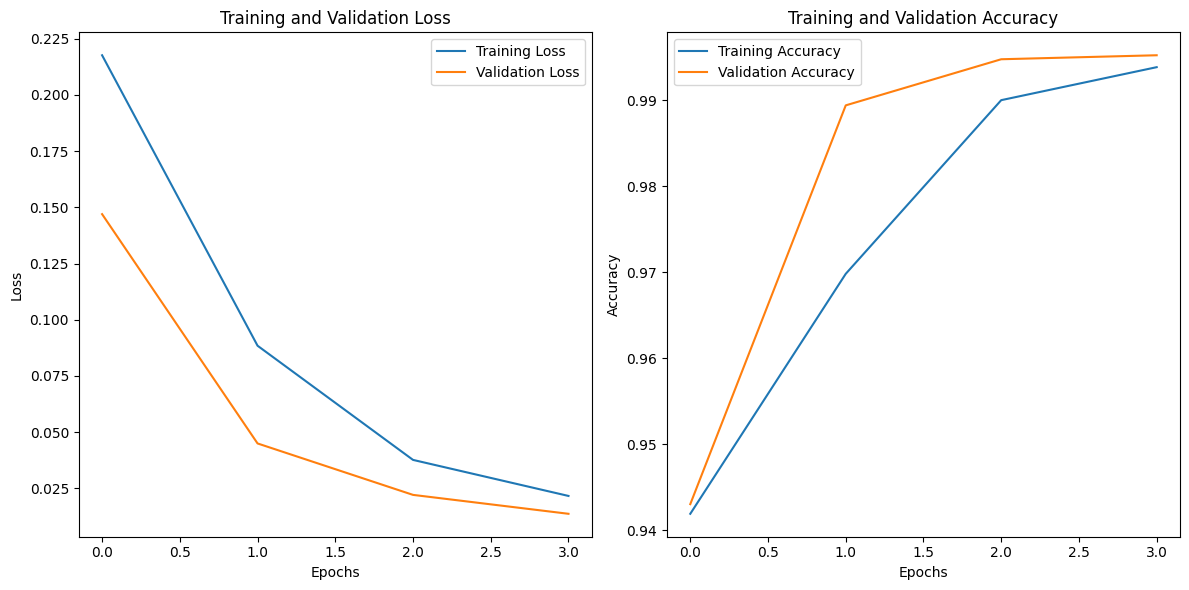

In [170]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Extract Features from CNN-LSTM for XGBoost


In [171]:
# Hyperparameter tuning
from scipy.stats import randint
# XGBoost for the final classification
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [173]:
# Let's extract the features from the last LSTM layer (before the Dense layer)
cnn_lstm_features_train = cnn_lstm_model.predict(X_train_reshaped)
cnn_lstm_features_test = cnn_lstm_model.predict(X_test_reshaped)


23294/23294 ━━━━━━━━━━━━━━━━━━━━ 315s 14ms/step
4111/4111 ━━━━━━━━━━━━━━━━━━━━ 60s 14ms/step


In [179]:

# XGBoost model for classification based on the features extracted from CNN-LSTM
xgb_clf = xgb.XGBClassifier(random_state=45)

# Hyperparameter tuning for XGBoost
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 20),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'class_weight': ['balanced']
}

# Hyperparameter optimization for XGBoost using RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=45)
random_search.fit(cnn_lstm_features_train, y_train)

# Best hyperparameters found by RandomizedSearchCV
print("Best hyperparameters for XGBoost:")
print(random_search.best_params_)

# Train the best XGBoost model
best_xgb_clf = random_search.best_estimator_

# Predict and evaluate on train and test sets
y_pred_train_xgb = best_xgb_clf.predict(cnn_lstm_features_train)
y_pred_test_xgb = best_xgb_clf.predict(cnn_lstm_features_test)

# Calculate F1 score
f1_train_xgb = f1_score(y_train, y_pred_train_xgb, average='weighted')
f1_test_xgb = f1_score(y_test, y_pred_test_xgb, average='weighted')



Best hyperparameters for XGBoost:
{'class_weight': 'balanced', 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 225, 'subsample': 1.0}


In [180]:
print(f'The F1 score using XGBoost for Training Dataset is {f1_train_xgb*100:.3f}')
print(f'The F1 score using XGBoost for Testing Dataset is {f1_test_xgb*100:.3f}')

The F1 score using XGBoost for Training Dataset is 99.787
The F1 score using XGBoost for Testing Dataset is 99.786


In [181]:
# Importing necessary libraries for evaluation
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

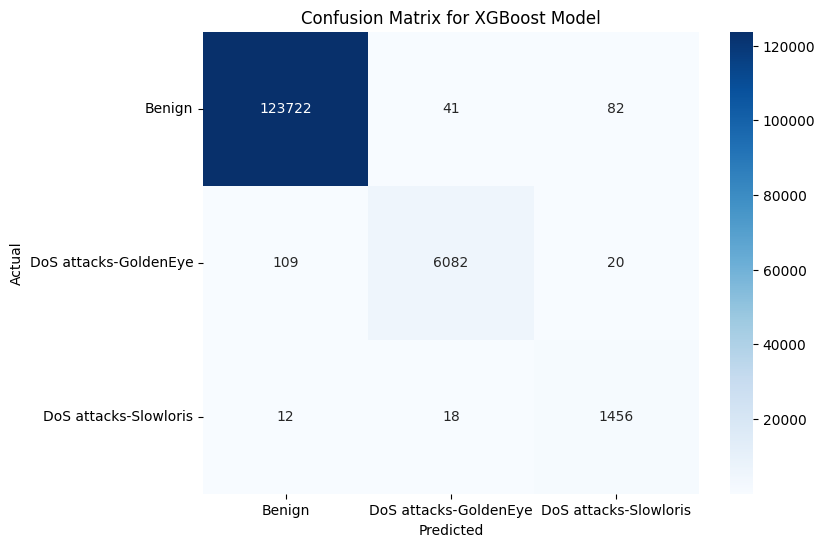

In [186]:
# Assuming `y_test` is the true labels and `y_pred_test_xgb` is the predicted labels from XGBoost
conf_matrix = confusion_matrix(y_test, y_pred_test_xgb)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [184]:
accuracy = accuracy_score(y_test, y_pred_test_xgb)
print(f' Test accuracy: {accuracy:.4f}')

 Test accuracy: 0.9979
